In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Dependencies
from api_keys import (gkey)
import gmaps

# Incorporated citipy to determine city based on latitude and longitude, if needed
from citipy import citipy


In [55]:
# Import csv data file as DataFrame
cocoa_pd = pd.read_csv("flavors_of_cacao_2018.csv")
cocoa_pd.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Bolivia,797,2012,0.70,France,3.50,NaN,Bolivia
1,A. Morin,Peru,797,2012,0.63,France,3.75,NaN,Peru
2,A. Morin,Brazil,1011,2013,0.70,France,3.25,NaN,Brazil
3,A. Morin,Birmanie,1015,2013,0.70,France,3.00,NaN,Burma
4,A. Morin,Colombie,1015,2013,0.70,France,2.75,NaN,Colombia


In [56]:
#checking headers for mysterious symbols
list(cocoa_pd)

['Company\xa0\r\n(Maker-if known)',
 'Specific Bean Origin\r\nor Bar Name',
 'REF',
 'Review\r\nDate',
 'Cocoa\r\nPercent',
 'Company\r\nLocation',
 'Rating',
 'Bean\r\nType',
 'Broad Bean\r\nOrigin']

In [57]:
#renaming columns to something I can understand
cocoa_pd.rename(columns={'Company\xa0\r\n(Maker-if known)': 'Company', 'Specific Bean Origin\r\nor Bar Name': 'Bar Name',
                        'REF':'RefNo', 'Review\r\nDate':'Review Date', 'Cocoa\r\nPercent':'Cocoa %', 'Company\r\nLocation':'Company Location',
                        'Rating':'Rating','Bean\r\nType':'Bean Type', 'Broad Bean\r\nOrigin':'Bean Origin'}, inplace=True)
#cocoa_pd.head()

#checking if company countries make sense
cocoa_pd['Company Location'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Russia', 'Peru', 'Canada', 'Italy',
       'Brazil', 'U.K.', 'Philippines', 'Australia', 'Wales', 'Belgium',
       'Germany', 'Venezuela', 'Puerto Rico', 'Colombia', 'Japan',
       'South Korea', 'New Zealand', 'Costa Rica', 'Amsterdam',
       'Scotland', 'Martinique', 'Sao Tome', 'Argentina', 'Guatemala',
       'South Africa', 'Bolivia', 'St. Lucia', 'Portugal', 'Singapore',
       'Denmark', 'Vietnam', 'Grenada', 'Israel', 'India',
       'Czech Republic', 'Dominican Republic', 'Finland', 'Madagascar',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'U.A.E.', 'Nicaragua',
       'Lithuania', 'Ireland', 'Chile', 'Ghana', 'Iceland', 'Hungary',
       'Suriname'], dtype=object)

In [58]:
#some locations are not countries, renaming...
#cocoa_pd['Company Location'].replace('Amsterdam','Netherlands', inplace=True)
#cocoa_pd['Company Location'].replace('Wales','Great Britain', inplace=True)
#cocoa_pd['Company Location'].unique()


In [59]:
# found spelling errors as well...decided to overwrite all of the countries...
# Import a csv file with corrected company location country name as DataFrame
countries1 = pd.read_csv("countrylocname.csv")
countries1.head()

#merge with cocoa_pd data
cocoa_merged = pd.merge(cocoa_pd, countries1, how="left", on=["Company Location", "Company Location"])
cocoa_merged.head()

,Company,Bar Name,RefNo,Review Date,Cocoa %,Company Location,Rating,Bean Type,Bean Origin,Company Country Name
0,A. Morin,Bolivia,797,2012,0.70,France,3.50,NaN,Bolivia,France
1,A. Morin,Peru,797,2012,0.63,France,3.75,NaN,Peru,France
2,A. Morin,Brazil,1011,2013,0.70,France,3.25,NaN,Brazil,France
3,A. Morin,Birmanie,1015,2013,0.70,France,3.00,NaN,Burma,France
4,A. Morin,Colombie,1015,2013,0.70,France,2.75,NaN,Colombia,France


In [60]:
# Import a csv file with corrected bean country of origin as DataFrame
countries2 = pd.read_csv("country_of_origin.csv",encoding='latin-1')
#countries2.head()

#merge with cocoa_pd data
cocoa_merged2 = pd.merge(cocoa_merged, countries2, how="left", on=["Bean Origin", "Bean Origin"])
cocoa_merged2.head()

,Company,Bar Name,RefNo,Review Date,Cocoa %,Company Location,Rating,Bean Type,Bean Origin,Company Country Name,Bean Origin Country Name
0,A. Morin,Bolivia,797,2012,0.70,France,3.50,NaN,Bolivia,France,Plurinational State of Bolivia
1,A. Morin,Peru,797,2012,0.63,France,3.75,NaN,Peru,France,Peru
2,A. Morin,Brazil,1011,2013,0.70,France,3.25,NaN,Brazil,France,Brazil
3,A. Morin,Birmanie,1015,2013,0.70,France,3.00,NaN,Burma,France,Myanmar
4,A. Morin,Colombie,1015,2013,0.70,France,2.75,NaN,Colombia,France,Colombia


In [61]:
# Import a csv file with corrected bean country of origin as DataFrame
countries3 = pd.read_csv("ethical_sources.csv",encoding='latin-1')
#countries2.head()

#merge with cocoa_pd data
cocoa_fnl = pd.merge(cocoa_merged2, countries3, how="left", on=["Company", "Company"])
cocoa_fnl.head()

,Company,Bar Name,RefNo,Review Date,Cocoa %,Company Location,Rating,Bean Type,Bean Origin,Company Country Name,Bean Origin Country Name,Ethical
0,A. Morin,Bolivia,797,2012,0.70,France,3.50,NaN,Bolivia,France,Plurinational State of Bolivia,no
1,A. Morin,Peru,797,2012,0.63,France,3.75,NaN,Peru,France,Peru,no
2,A. Morin,Brazil,1011,2013,0.70,France,3.25,NaN,Brazil,France,Brazil,no
3,A. Morin,Birmanie,1015,2013,0.70,France,3.00,NaN,Burma,France,Myanmar,no
4,A. Morin,Colombie,1015,2013,0.70,France,2.75,NaN,Colombia,France,Colombia,no


In [62]:
#drop the original country name and bean origin columns, keep the corrected ones
cocoa_fnl.drop(['Company Location', 'Bean Origin'], axis=1, inplace =True)
cocoa_fnl
#the dataset is cleaner now

,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical
0,A. Morin,Bolivia,797,2012,0.70,3.50,NaN,France,Plurinational State of Bolivia,no
1,A. Morin,Peru,797,2012,0.63,3.75,NaN,France,Peru,no
2,A. Morin,Brazil,1011,2013,0.70,3.25,NaN,France,Brazil,no
3,A. Morin,Birmanie,1015,2013,0.70,3.00,NaN,France,Myanmar,no
4,A. Morin,Colombie,1015,2013,0.70,2.75,NaN,France,Colombia,no
5,A. Morin,Equateur,1011,2013,0.70,3.75,NaN,France,Ecuador,no
6,A. Morin,Madagascar,1011,2013,0.70,3.00,Criollo,France,Madagascar,no
7,A. Morin,Panama,1011,2013,0.70,2.75,NaN,France,Panama,no
8,A. Morin,Papua New Guinea,1015,2013,0.70,3.25,NaN,France,Papua New Guinea,no
9,A. Morin,Chanchamayo Province,1019,2013,0.63,4.00,NaN,France,Peru,no


In [63]:
cocoa_grouped = cocoa_fnl.groupby(['Review Date'])['Rating'].\
    agg(['count', 'mean', 'median'])
cocoa_grouped=cocoa_grouped.round(2)
cocoa_grouped.columns=['Count', 'Average Rating', 'Median Rating']
cocoa_grouped

,Count,Average Rating,Median Rating
Review Date,,,
2006,71,3.10,3.00
2007,73,3.10,3.00
2008,93,2.99,3.00
2009,123,3.07,3.00
2010,111,3.15,3.25
2011,165,3.26,3.25
2012,195,3.18,3.25
2013,184,3.20,3.25
2014,247,3.19,3.25


<Figure size 4000x3600 with 0 Axes>

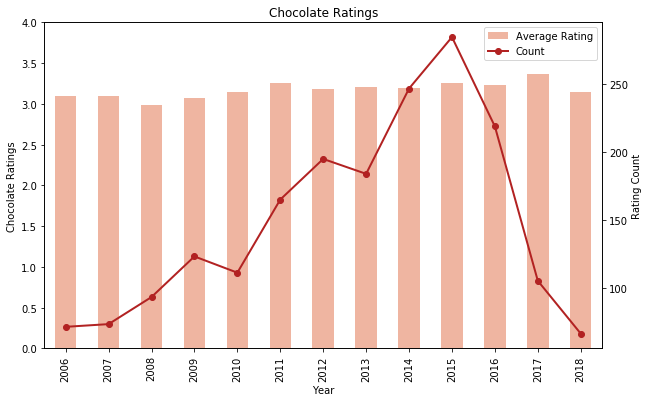

In [64]:
# making a combination chart
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(10,6)
#rcParams.keys

import matplotlib.pyplot as plt
plt.figure(figsize=(20,18), dpi=200)
ax = cocoa_grouped[['Average Rating']].plot(kind='bar', color='darksalmon', alpha=0.7, use_index=True, legend=False)
ax2 = ax.twinx()
ax2.plot(cocoa_grouped[['Count']].values, linestyle='-', marker='o', color='firebrick', linewidth=2.0, label="Count")
ax.set_ylim((0, 4))

ax.set_xlabel('Year')
ax.set_ylabel('Chocolate Ratings')
ax2.set_ylabel('Rating Count')
plt.title('Chocolate Ratings')
#plt.xlabel('Year')

# ask matplotlib for the plotted objects and their labels
#documentation is https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels+labels2, loc=0)

plt.savefig('chocolate ratings.png')
#plt.grid()
plt.show()


In [65]:
#checking averages and medians for Companies that made chocolate
cocoa_grouped1 = cocoa_fnl.groupby(['Company Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
cocoa_grouped1=cocoa_grouped1.round(2)
cocoa_grouped1.columns=['Count', 'Average Rating', 'Median Rating']
#cocoa_grouped1
sorted_places = cocoa_grouped1.sort_values(['Count'], ascending=False, inplace=False)
top_10 = sorted_places.head(10)
top_10

,Count,Average Rating,Median Rating
Company Country Name,,,
United States of America,819,3.17,3.25
France,159,3.25,3.25
Canada,135,3.31,3.25
United Kingdom of Great Britain and Northern Ireland,126,3.07,3.00
Italy,73,3.24,3.25
Ecuador,56,3.01,3.00
Australia,50,3.36,3.50
Belgium,43,3.11,3.25
Germany,39,3.20,3.25


In [66]:
# group by company and country to look at the ratings within the country-producer
fnl_grouped = cocoa_fnl.groupby(['Company Country Name', 'Bean Origin Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_grouped=fnl_grouped.round(2)
fnl_grouped.columns=['Count', 'Average Rating', 'Median Rating']
fnl_grouped

sorted_fnl = fnl_grouped.sort_values(['Company Country Name','Count'], ascending=False, inplace=False)
sorted_fnl.head()



Count  \
Company Country Name               Bean Origin Country Name                    
Viet Nam                           Viet Nam                               11   
Venezuela (Bolivarian Republic of) Venezuela (Bolivarian Republic of)     26   
United States of America           Dominican Republic                    116   
                                   Peru                                   89   
                                   Venezuela (Bolivarian Republic of)     84   

                                                                       Average Rating  \
Company Country Name               Bean Origin Country Name                             
Viet Nam                           Viet Nam                                      3.41   
Venezuela (Bolivarian Republic of) Venezuela (Bolivarian Republic of)            3.14   
United States of America           Dominican Republic                            3.18   
                                   Peru                                          3.12   
                                   Venezuela (Bolivarian Republic of)            3.10   

                                                                       Median Rating  
Company Country Name               Bean Origin Country Name                           
Viet Nam                           Viet Nam                                     3.50  
Venezuela (Bolivarian Republic of) Venezuela (Bolivarian Republic of)           3.12  
United States of America           Dominican Republic                           3.25  
                                   Peru                                         3.00  
                                   Venezuela (Bolivarian Republic of)           3.00

In [67]:
# test and see what data looks like on one country
params = {"key": gkey}
country='Venezuela (Bolivarian Republic of)'
params['address'] = f"{country}"

base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    # make request
countries_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    #print(cities_lat_lng.url)
    
    # convert to json
countries_lat_lng = countries_lat_lng.json() # update address key value
countries_lat_lng

{'results': [{'address_components': [{'long_name': 'Venezuela',
     'short_name': 'VE',
     'types': ['country', 'political']}],
   'formatted_address': 'Venezuela',
   'geometry': {'bounds': {'northeast': {'lat': 12.6886, 'lng': -59.805666},
     'southwest': {'lat': 0.6475291, 'lng': -73.36703899999999}},
    'location': {'lat': 6.42375, 'lng': -66.58973},
    'location_type': 'APPROXIMATE',
    'viewport': {'northeast': {'lat': 12.770409, 'lng': -59.80378},
     'southwest': {'lat': 0.5438179, 'lng': -73.4255611}}},
   'place_id': 'ChIJAdjLNstTKIwR003VfFjyoNw',
   'types': ['country', 'political']}],
 'status': 'OK'}

In [68]:
#creating a variable to hold unique company country names
comp_country=cocoa_fnl['Company Country Name'].unique()

#creating a country lat long dictionary
country_lat_long_dict={}
for country in comp_country:
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    params['address'] = f"{country}"

    # make request
    countries_lat_lng = requests.get(base_url, params=params)
    
    # print the countries_lat_lng url, doe not copy to github --delete!!!!
    #print(cities_lat_lng.url)
    
    # convert to json
    countries_lat_lng = countries_lat_lng.json() # update address key value
    
    lat= countries_lat_lng["results"][0]["geometry"]["location"]["lat"]
    lng = countries_lat_lng["results"][0]["geometry"]["location"]["lng"]
    short=countries_lat_lng["results"][0]["address_components"][0]["short_name"]
    #pass lats and longs into the dictionary
    country_lat_long_dict[country]=[lat, lng, short]
# Visualize to confirm lat lng appear
country_lat_long_dict
        

{'France': [46.227638, 2.213749, 'FR'],
 'United States of America': [37.09024, -95.712891, 'US'],
 'Fiji': [-17.713371, 178.065032, 'FJ'],
 'Ecuador': [-1.831239, -78.18340599999999, 'EC'],
 'Mexico': [23.634501, -102.552784, 'MX'],
 'Switzerland': [46.818188, 8.227511999999999, 'CH'],
 'Netherlands': [52.132633, 5.291265999999999, 'NL'],
 'Spain': [40.46366700000001, -3.74922, 'ES'],
 'Russian Federation': [61.52401, 105.318756, 'RU'],
 'Peru': [-9.189967, -75.015152, 'PE'],
 'Canada': [56.130366, -106.346771, 'CA'],
 'Italy': [41.87194, 12.56738, 'IT'],
 'Brazil': [-14.235004, -51.92528, 'BR'],
 'United Kingdom of Great Britain and Northern Ireland': [55.378051,
  -3.435973,
  'GB'],
 'Philippines': [12.879721, 121.774017, 'PH'],
 'Australia': [-25.274398, 133.775136, 'AU'],
 'Belgium': [50.503887, 4.469936, 'BE'],
 'Germany': [51.165691, 10.451526, 'DE'],
 'Venezuela (Bolivarian Republic of)': [6.42375, -66.58973, 'VE'],
 'Puerto Rico': [18.220833, -66.590149, 'PR'],
 'Colombia': [

In [69]:
cocoa_fnl['Country Lat']=cocoa_fnl['Company Country Name'].apply(lambda x: country_lat_long_dict[x][0])
cocoa_fnl['Country Lng']=cocoa_fnl['Company Country Name'].apply(lambda x: country_lat_long_dict[x][1])
cocoa_fnl['Country Abbr']=cocoa_fnl['Company Country Name'].apply(lambda x: country_lat_long_dict[x][2])
cocoa_fnl.head()


,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical,Country Lat,Country Lng,Country Abbr
0,A. Morin,Bolivia,797,2012,0.70,3.50,NaN,France,Plurinational State of Bolivia,no,46.227638,2.213749,FR
1,A. Morin,Peru,797,2012,0.63,3.75,NaN,France,Peru,no,46.227638,2.213749,FR
2,A. Morin,Brazil,1011,2013,0.70,3.25,NaN,France,Brazil,no,46.227638,2.213749,FR
3,A. Morin,Birmanie,1015,2013,0.70,3.00,NaN,France,Myanmar,no,46.227638,2.213749,FR
4,A. Morin,Colombie,1015,2013,0.70,2.75,NaN,France,Colombia,no,46.227638,2.213749,FR


In [70]:
#creating a variable to hold unique Bean Origin country names

orig_country=cocoa_fnl['Bean Origin Country Name'].unique()
#creating a country lat long dictionary
origin_lat_long_dict={}
for country in orig_country:
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    params['address'] = f"{country}"

    # make request
    origin_lat_lng = requests.get(base_url, params=params)
    
    # convert to json
    origin_lat_lng = origin_lat_lng.json() # update address key value
    
    o_lat= origin_lat_lng["results"][0]["geometry"]["location"]["lat"]
    o_lng = origin_lat_lng["results"][0]["geometry"]["location"]["lng"]
    o_short=origin_lat_lng["results"][0]["address_components"][0]["short_name"]
    #pass lats and longs into the dictionary
    origin_lat_long_dict[country]=[o_lat, o_lng, o_short]
# Visualize to confirm lat lng appear
#replacing US lat long with Hawaii lat-long for origin
origin_lat_long_dict['United States of America']=[19.8968, 155.5828, 'US']
origin_lat_long_dict

{'Plurinational State of Bolivia': [-16.290154, -63.58865299999999, 'BO'],
 'Peru': [-9.189967, -75.015152, 'PE'],
 'Brazil': [-14.235004, -51.92528, 'BR'],
 'Myanmar': [21.916221, 95.955974, 'MM'],
 'Colombia': [4.570868, -74.297333, 'CO'],
 'Ecuador': [-1.831239, -78.18340599999999, 'EC'],
 'Madagascar': [-18.766947, 46.869107, 'MG'],
 'Panama': [8.537981, -80.782127, 'PA'],
 'Papua New Guinea': [-6.314992999999999, 143.95555, 'PG'],
 'Venezuela (Bolivarian Republic of)': [6.42375, -66.58973, 'VE'],
 'Cuba': [21.521757, -77.781167, 'CU'],
 'Togo': [8.619543, 0.824782, 'TG'],
 'Sao Tome and Principe': [0.18636, 6.613080999999999, 'ST'],
 'Fiji': [-17.713371, 178.065032, 'FJ'],
 'Mexico': [23.634501, -102.552784, 'MX'],
 'Indonesia': [-0.789275, 113.921327, 'ID'],
 'Trinidad and Tobago': [10.691803, -61.222503, 'TT'],
 'Viet Nam': [14.058324, 108.277199, 'VN'],
 'Nicaragua': [12.865416, -85.207229, 'NI'],
 'Tanzania, United Republic of': [-6.369028, 34.888822, 'TZ'],
 'Dominican Republ

In [71]:
cocoa_fnl['Origin Lat']=cocoa_fnl['Bean Origin Country Name'].apply(lambda x: origin_lat_long_dict[x][0])
cocoa_fnl['Origin Lng']=cocoa_fnl['Bean Origin Country Name'].apply(lambda x: origin_lat_long_dict[x][1])
cocoa_fnl['Origin Abbr']=cocoa_fnl['Bean Origin Country Name'].apply(lambda x: origin_lat_long_dict[x][2])
cocoa_fnl.to_csv("output.csv", index=True, header=True)
cocoa_fnl.head()

,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical,Country Lat,Country Lng,Country Abbr,Origin Lat,Origin Lng,Origin Abbr
0,A. Morin,Bolivia,797,2012,0.70,3.50,NaN,France,Plurinational State of Bolivia,no,46.227638,2.213749,FR,-16.290154,-63.588653,BO
1,A. Morin,Peru,797,2012,0.63,3.75,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE
2,A. Morin,Brazil,1011,2013,0.70,3.25,NaN,France,Brazil,no,46.227638,2.213749,FR,-14.235004,-51.925280,BR
3,A. Morin,Birmanie,1015,2013,0.70,3.00,NaN,France,Myanmar,no,46.227638,2.213749,FR,21.916221,95.955974,MM
4,A. Morin,Colombie,1015,2013,0.70,2.75,NaN,France,Colombia,no,46.227638,2.213749,FR,4.570868,-74.297333,CO


In [72]:
# grabbing the continent for every country
orig_abbr=cocoa_fnl['Origin Abbr'].unique()
#creating a continent dictionary - not needed, already a dict
#origin_cont_dict={}
for abbr in orig_abbr:
    cont_url = "http://country.io/continent.json"

    params['address'] = f"{abbr}"

    # make request
    origin_cont = requests.get(cont_url, params=params)
    
    # convert to json
    origin_cont = origin_cont.json() # update address key value
    origin_cont["No Origin"]='None'
origin_cont

{'BD': 'AS',
 'BE': 'EU',
 'BF': 'AF',
 'BG': 'EU',
 'BA': 'EU',
 'BB': 'NA',
 'WF': 'OC',
 'BL': 'NA',
 'BM': 'NA',
 'BN': 'AS',
 'BO': 'SA',
 'BH': 'AS',
 'BI': 'AF',
 'BJ': 'AF',
 'BT': 'AS',
 'JM': 'NA',
 'BV': 'AN',
 'BW': 'AF',
 'WS': 'OC',
 'BQ': 'NA',
 'BR': 'SA',
 'BS': 'NA',
 'JE': 'EU',
 'BY': 'EU',
 'BZ': 'NA',
 'RU': 'EU',
 'RW': 'AF',
 'RS': 'EU',
 'TL': 'OC',
 'RE': 'AF',
 'TM': 'AS',
 'TJ': 'AS',
 'RO': 'EU',
 'TK': 'OC',
 'GW': 'AF',
 'GU': 'OC',
 'GT': 'NA',
 'GS': 'AN',
 'GR': 'EU',
 'GQ': 'AF',
 'GP': 'NA',
 'JP': 'AS',
 'GY': 'SA',
 'GG': 'EU',
 'GF': 'SA',
 'GE': 'AS',
 'GD': 'NA',
 'GB': 'EU',
 'GA': 'AF',
 'SV': 'NA',
 'GN': 'AF',
 'GM': 'AF',
 'GL': 'NA',
 'GI': 'EU',
 'GH': 'AF',
 'OM': 'AS',
 'TN': 'AF',
 'JO': 'AS',
 'HR': 'EU',
 'HT': 'NA',
 'HU': 'EU',
 'HK': 'AS',
 'HN': 'NA',
 'HM': 'AN',
 'VE': 'SA',
 'PR': 'NA',
 'PS': 'AS',
 'PW': 'OC',
 'PT': 'EU',
 'SJ': 'EU',
 'PY': 'SA',
 'IQ': 'AS',
 'PA': 'NA',
 'PF': 'OC',
 'PG': 'OC',
 'PE': 'SA',
 'PK': 'AS',

In [73]:
#cocoa_fnl['Origin Abbr'].value_counts()

In [74]:
# defining a function to account for beans with undefined origin
def myfunc(val):
    if val == '#1': val = 'No Origin' #tmporary placeholder
    if val=='47-04': val = 'No Origin'
    #print(origin_cont[val])
    return origin_cont[val]
newcol= []
cocoa_fnl['Origin Cont'] = cocoa_fnl['Origin Abbr'].apply(myfunc)
cocoa_fnl

,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical,Country Lat,Country Lng,Country Abbr,Origin Lat,Origin Lng,Origin Abbr,Origin Cont
0,A. Morin,Bolivia,797,2012,0.70,3.50,NaN,France,Plurinational State of Bolivia,no,46.227638,2.213749,FR,-16.290154,-63.588653,BO,SA
1,A. Morin,Peru,797,2012,0.63,3.75,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE,SA
2,A. Morin,Brazil,1011,2013,0.70,3.25,NaN,France,Brazil,no,46.227638,2.213749,FR,-14.235004,-51.925280,BR,SA
3,A. Morin,Birmanie,1015,2013,0.70,3.00,NaN,France,Myanmar,no,46.227638,2.213749,FR,21.916221,95.955974,MM,AS
4,A. Morin,Colombie,1015,2013,0.70,2.75,NaN,France,Colombia,no,46.227638,2.213749,FR,4.570868,-74.297333,CO,SA
5,A. Morin,Equateur,1011,2013,0.70,3.75,NaN,France,Ecuador,no,46.227638,2.213749,FR,-1.831239,-78.183406,EC,SA
6,A. Morin,Madagascar,1011,2013,0.70,3.00,Criollo,France,Madagascar,no,46.227638,2.213749,FR,-18.766947,46.869107,MG,AF
7,A. Morin,Panama,1011,2013,0.70,2.75,NaN,France,Panama,no,46.227638,2.213749,FR,8.537981,-80.782127,PA,NA
8,A. Morin,Papua New Guinea,1015,2013,0.70,3.25,NaN,France,Papua New Guinea,no,46.227638,2.213749,FR,-6.314993,143.955550,PG,OC
9,A. Morin,Chanchamayo Province,1019,2013,0.63,4.00,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE,SA


In [75]:
# Create bins in which to place values based upon TED Talk views
perc_bins = [0, 0.6, 0.7, 0.8, 0.9, 1]

# Create labels for these bins
bin_labels = ["0 to 60%", "60 to 70%", "70 to 80%", "80 to 90%", "90 to 100%"]
#cocoa_fnl['Cocoa %'] = pd.to_numeric(cocoa_fnl['Cocoa %'], errors='coerce')
#cocoa_fnl
#cocoa_fnl['Cocoa %'] = cocoa_fnl['Cocoa %'].astype(float)
# Slice the data and place it into bins
pd.cut(cocoa_fnl["Cocoa %"], perc_bins, labels=bin_labels).head()
#cocoa_fnl.dtypes #checking data types in each column
# Place the data series into a new column inside of the DataFrame
cocoa_fnl["Cocoa % Group"] = pd.cut(cocoa_fnl["Cocoa %"], perc_bins, labels=bin_labels)
cocoa_fnl.head()

,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical,Country Lat,Country Lng,Country Abbr,Origin Lat,Origin Lng,Origin Abbr,Origin Cont,Cocoa % Group
0,A. Morin,Bolivia,797,2012,0.70,3.50,NaN,France,Plurinational State of Bolivia,no,46.227638,2.213749,FR,-16.290154,-63.588653,BO,SA,60 to 70%
1,A. Morin,Peru,797,2012,0.63,3.75,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE,SA,60 to 70%
2,A. Morin,Brazil,1011,2013,0.70,3.25,NaN,France,Brazil,no,46.227638,2.213749,FR,-14.235004,-51.925280,BR,SA,60 to 70%
3,A. Morin,Birmanie,1015,2013,0.70,3.00,NaN,France,Myanmar,no,46.227638,2.213749,FR,21.916221,95.955974,MM,AS,60 to 70%
4,A. Morin,Colombie,1015,2013,0.70,2.75,NaN,France,Colombia,no,46.227638,2.213749,FR,4.570868,-74.297333,CO,SA,60 to 70%


In [76]:
# group by continent to look at the ratings
perc_grouped = cocoa_fnl.groupby(['Cocoa % Group'])['Rating'].\
    agg(['count', 'mean', 'median'])
perc_grouped=perc_grouped.round(2)
perc_grouped.columns=['Count', 'Average Rating', 'Median Rating']
perc_grouped

,Count,Average Rating,Median Rating
Cocoa % Group,,,
0 to 60%,76,2.98,3.00
60 to 70%,1011,3.27,3.25
70 to 80%,738,3.16,3.25
80 to 90%,87,3.00,3.00
90 to 100%,25,2.27,2.00


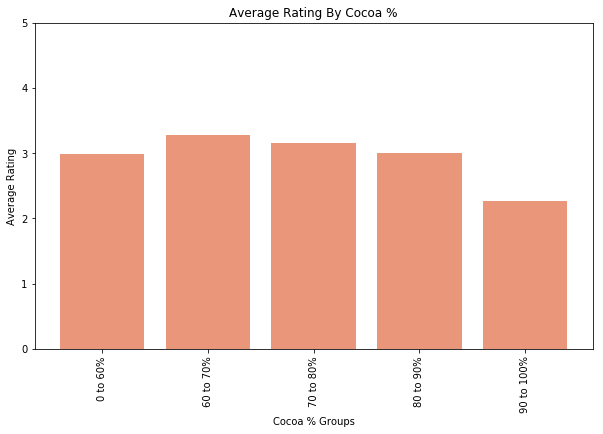

In [77]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(10,6)
#rcParams.keys
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

x = perc_grouped.index
y = perc_grouped['Average Rating']

_x=np.arange(len(x))

plt.ylim(0, 5)

plt.bar(_x, y, 0.8, color='darksalmon')

plt.xticks(_x, x, rotation=90) # set labels manually

plt.title("Average Rating By Cocoa %")
plt.xlabel("Cocoa % Groups")
plt.ylabel("Average Rating")
#plt.legend(country,loc=2)

plt.savefig('AverageRatingByPerc.png')

#plt.grid()
plt.show()

In [78]:
# group by continent to look at the ratings
cont_grouped = cocoa_fnl.groupby(['Origin Cont'])['Rating'].\
    agg(['count', 'mean', 'median'])
cont_grouped=cont_grouped.round(2)
cont_grouped.columns=['Count', 'Average Rating', 'Median Rating']
cont_grouped


,Count,Average Rating,Median Rating
Origin Cont,,,
AF,289,3.18,3.25
AS,91,3.22,3.25
NA,602,3.20,3.25
None,75,2.92,3.00
OC,72,3.28,3.25
SA,808,3.20,3.25


In [79]:
#cocoa_fnl['Company'].unique()
eth = cocoa_fnl.drop_duplicates(subset=['Company','Ethical'])
eth_grouped = eth.groupby(['Ethical'])['Rating'].\
    agg(['count', 'mean', 'median'])
eth_grouped=eth_grouped.round(2)
eth_grouped.columns=['Count', 'Average Rating', 'Median Rating']
eth_grouped


,Count,Average Rating,Median Rating
Ethical,,,
no,391,3.15,3.25
yes,50,3.04,3.00


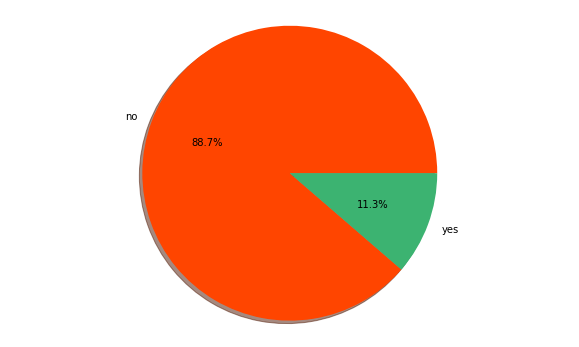

In [80]:
# Labels for the sections of our pie chart
labels = eth_grouped.index

# The values of each section of the pie chart
sizes = eth_grouped['Count']

# The colors of each section of the pie chart
colors = ["orangered", "mediumseagreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
    
plt.axis("equal")
plt.savefig('PercentEthical.png')

In [81]:
# group by continent to look at the ratings
eth_grouped = cocoa_fnl.groupby(['Ethical'])['Rating'].\
    agg(['count', 'mean', 'median'])
eth_grouped=eth_grouped.round(2)
eth_grouped.columns=['Count', 'Average Rating', 'Median Rating']
eth_grouped

#sorted_fnl = fnl_grouped.sort_values(['Company Country Name','Count'], ascending=False, inplace=False)
#sorted_fnl.head()

,Count,Average Rating,Median Rating
Ethical,,,
no,1625,3.18,3.25
yes,311,3.21,3.25


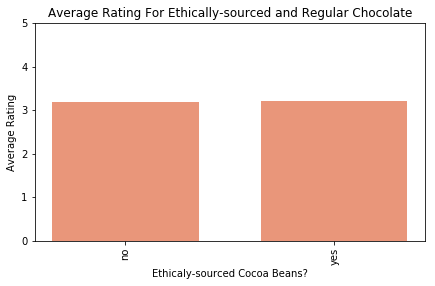

In [82]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(7,4)
#rcParams.keys
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

x = eth_grouped.index
y = eth_grouped['Average Rating']

_x=np.arange(len(x))

plt.ylim(0, 5)

plt.bar(_x, y, 0.7, color='darksalmon')

plt.xticks(_x, x, rotation=90) # set labels manually

plt.title("Average Rating For Ethically-sourced and Regular Chocolate")
plt.xlabel("Ethicaly-sourced Cocoa Beans?")
plt.ylabel("Average Rating")
#plt.legend(country,loc=2)

plt.savefig('EthicallySourcedBar.png')

#plt.grid()
plt.show()

In [83]:
cocoa_fnl_map = cocoa_fnl[cocoa_fnl['Origin Cont'] != 'None']
cocoa_fnl_map = cocoa_fnl_map.dropna(subset=['Company Country Name'])
#cocoa_fnl_map=cocoa_fnl_map[cocoa_fnl_map['Company Country Name']]
cocoa_fnl_map
cocoa_fnl_map.to_csv("output1.csv", index=True, header=True)

In [84]:
#remove empty rows
cocoa_fnl_map = cocoa_fnl[cocoa_fnl['Origin Cont'] != 'None']
cocoa_fnl_map = cocoa_fnl_map.dropna(subset=['Company Country Name'])
cocoa_fnl_map

# Create symbol layer
gmaps.configure(api_key=gkey)
locations = cocoa_fnl_map[["Country Lat", "Country Lng"]].astype(float)
locations_origin = cocoa_fnl_map[["Origin Lat", "Origin Lng"]].astype(float)

# Convert country to list
countrylist = cocoa_fnl_map["Company Country Name"].tolist()
originlist = cocoa_fnl_map["Bean Origin Country Name"].tolist()

company_country_layer = gmaps.symbol_layer(
    locations, fill_color='blue',
    stroke_color='blue', scale=3,
    info_box_content=[f"Company Country: {country}" for country in countrylist]
)

origin_country_layer = gmaps.symbol_layer(
    locations_origin, fill_color='red',
    stroke_color='red', scale=3,
    info_box_content=[f"Origin Country: {country}" for country in originlist]
)

fig = gmaps.figure()
fig.add_layer(company_country_layer)
fig.add_layer(origin_country_layer)
#plt.savefig('map_all.png')
fig


Figure(layout=FigureLayout(height='420px'))

In [85]:
#remove empty rows
cocoa_fnl_eth = cocoa_fnl[cocoa_fnl['Ethical'] != 'no']
cocoa_fnl_eth

# Create symbol layer
gmaps.configure(api_key=gkey)
locations = cocoa_fnl_eth[["Country Lat", "Country Lng"]].astype(float)
locations_origin = cocoa_fnl_eth[["Origin Lat", "Origin Lng"]].astype(float)

# Convert country to list
countrylist = cocoa_fnl_eth["Company Country Name"].tolist()
originlist = cocoa_fnl_eth["Bean Origin Country Name"].tolist()

company_country_layer = gmaps.symbol_layer(
    locations, fill_color='blue',
    stroke_color='blue', scale=3,
    info_box_content=[f"Company Country: {country}" for country in countrylist]
)

origin_country_layer = gmaps.symbol_layer(
    locations_origin, fill_color='red',
    stroke_color='red', scale=3,
    info_box_content=[f"Origin Country: {country}" for country in originlist]
)

fig = gmaps.figure()
fig.add_layer(company_country_layer)
fig.add_layer(origin_country_layer)
#plt.savefig('map_ethical.png')
fig



Figure(layout=FigureLayout(height='420px'))

In [86]:
fnl_grouped = cocoa_fnl.groupby(['Bean Origin Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_grouped=fnl_grouped.round(2)
fnl_grouped.columns=['Count', 'Average Rating', 'Median Rating']
fnl_grouped
sorted_fnl = fnl_grouped.sort_values(['Average Rating'], ascending=False, inplace=False)
sorted_fnl.head(10)

,Count,Average Rating,Median Rating
Bean Origin Country Name,,,
Solomon Islands,5,3.55,3.50
Haiti,19,3.39,3.50
blend,2,3.38,3.38
Guatemala,37,3.32,3.25
Viet Nam,45,3.32,3.50
Congo,10,3.32,3.38
Vanuatu,8,3.31,3.38
Brazil,62,3.29,3.38
Honduras,17,3.29,3.50


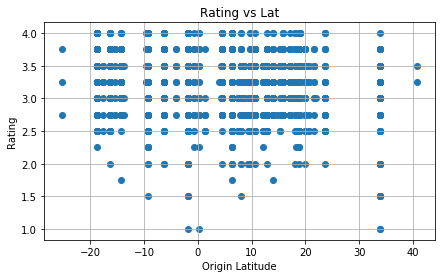

In [87]:
#scatter plot
# Build a scatter plot for each data type
plt.scatter(cocoa_fnl["Origin Lat"], cocoa_fnl["Rating"], marker="o")

# Incorporate the other graph properties
plt.title("Rating vs Lat")
plt.ylabel("Rating")
plt.xlabel("Origin Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Rating vs Lat.png")

# Show plot
plt.show()

In [88]:
fnl_grouped = cocoa_fnl.groupby(['Company Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_grouped=fnl_grouped.round(2)
fnl_grouped.columns=['Count', 'Average Rating', 'Median Rating']
fnl_grouped
sorted_fnl = fnl_grouped.sort_values(['Count'], ascending=False, inplace=False)
sorted_fnl.head(10)

,Count,Average Rating,Median Rating
Company Country Name,,,
United States of America,819,3.17,3.25
France,159,3.25,3.25
Canada,135,3.31,3.25
United Kingdom of Great Britain and Northern Ireland,126,3.07,3.00
Italy,73,3.24,3.25
Ecuador,56,3.01,3.00
Australia,50,3.36,3.50
Belgium,43,3.11,3.25
Germany,39,3.20,3.25


In [89]:
fnl_grouped = cocoa_fnl.groupby(['Company Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_grouped=fnl_grouped.round(2)
fnl_grouped.columns=['Count', 'Average Rating', 'Median Rating']
fnl_grouped
sorted_fnl = fnl_grouped.sort_values(['Average Rating'], ascending=False, inplace=False)
sorted_fnl.head(10)

,Count,Average Rating,Median Rating
Company Country Name,,,
Chile,2,3.75,3.75
Viet Nam,11,3.41,3.50
Brazil,18,3.39,3.50
Poland,8,3.38,3.50
Netherlands,14,3.38,3.50
Australia,50,3.36,3.50
Guatemala,10,3.35,3.25
Switzerland,38,3.34,3.25
United Arab Emirates,4,3.31,3.38


<Figure size 4000x3600 with 0 Axes>

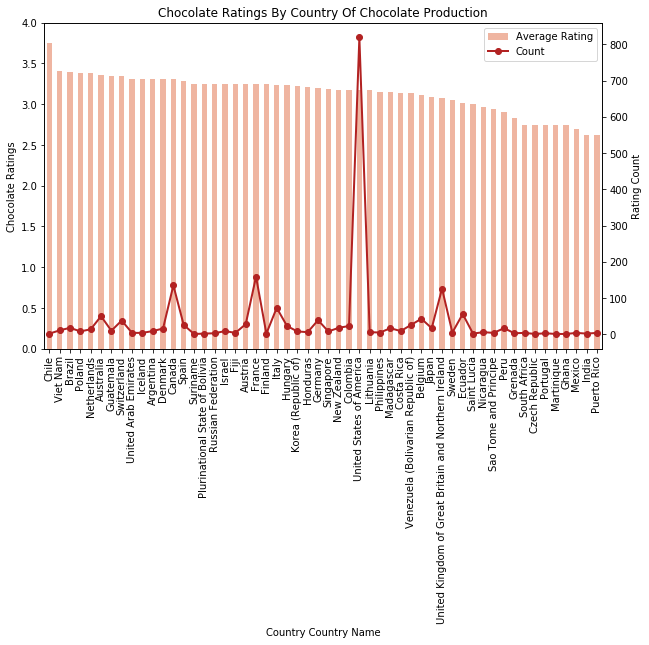

In [90]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(10,6)
#rcParams.keys

import matplotlib.pyplot as plt
plt.figure(figsize=(20,18), dpi=200)
ax = sorted_fnl[['Average Rating']].plot(kind='bar', color='darksalmon', alpha=0.7, use_index=True, legend=False)
ax2 = ax.twinx()
ax2.plot(sorted_fnl[['Count']].values, linestyle='-', marker='o', color='firebrick', linewidth=2.0, label="Count")
ax.set_ylim((0, 4))

ax.set_xlabel('Country Country Name')
ax.set_ylabel('Chocolate Ratings')
ax2.set_ylabel('Rating Count')
plt.title('Chocolate Ratings By Country Of Chocolate Production')
#plt.xlabel('Year')

# ask matplotlib for the plotted objects and their labels
#documentation is https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels+labels2, loc=0)
plt.savefig('RatingsProdCountry.png')
#plt.grid()
plt.show()

In [91]:
fnl_grouped = cocoa_fnl.groupby(['Bean Origin Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_grouped=fnl_grouped.round(2)
fnl_grouped.columns=['Count', 'Average Rating', 'Median Rating']
fnl_grouped
sorted_fnl = fnl_grouped.sort_values(['Average Rating'], ascending=False, inplace=False)
sorted_fnl.head(10)

,Count,Average Rating,Median Rating
Bean Origin Country Name,,,
Solomon Islands,5,3.55,3.50
Haiti,19,3.39,3.50
blend,2,3.38,3.38
Guatemala,37,3.32,3.25
Viet Nam,45,3.32,3.50
Congo,10,3.32,3.38
Vanuatu,8,3.31,3.38
Brazil,62,3.29,3.38
Honduras,17,3.29,3.50


<Figure size 4000x3600 with 0 Axes>

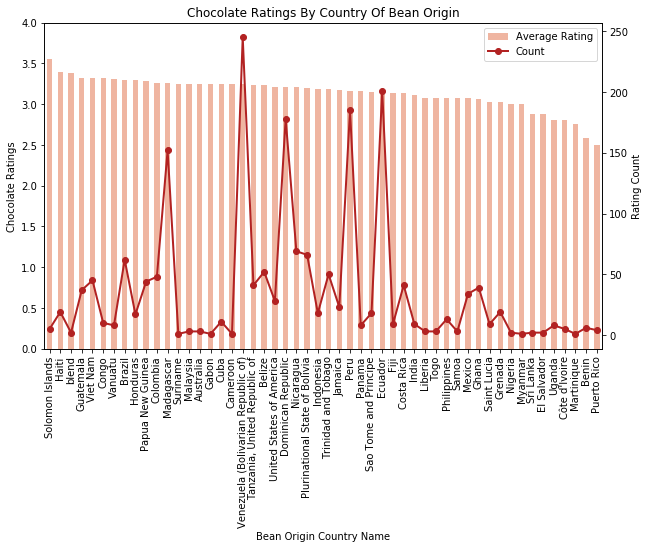

In [92]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(10,6)
#rcParams.keys

import matplotlib.pyplot as plt
plt.figure(figsize=(20,18), dpi=200)
ax = sorted_fnl[['Average Rating']].plot(kind='bar', color='darksalmon', alpha=0.7, use_index=True, legend=False)
ax2 = ax.twinx()
ax2.plot(sorted_fnl[['Count']].values, linestyle='-', marker='o', color='firebrick', linewidth=2.0, label="Count")
ax.set_ylim((0, 4))

ax.set_xlabel('Bean Origin Country Name')
ax.set_ylabel('Chocolate Ratings')
ax2.set_ylabel('Rating Count')
plt.title('Chocolate Ratings By Country Of Bean Origin')
#plt.xlabel('Year')

# ask matplotlib for the plotted objects and their labels
#documentation is https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels+labels2, loc=0)
plt.savefig('RatingsOriginCo.png')
#plt.grid()
plt.show()

In [93]:
cocoa_us=cocoa_fnl.loc[cocoa_fnl['Company Country Name'] == 'United States of America']
cocoa_us

,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical,Country Lat,Country Lng,Country Abbr,Origin Lat,Origin Lng,Origin Abbr,Origin Cont,Cocoa % Group
23,Acalli,"Chulucanas, El Platanal",1462,2015,0.70,3.75,NaN,United States of America,Peru,no,37.09024,-95.712891,US,-9.189967,-75.015152,PE,SA,60 to 70%
24,Acalli,"Tumbes, Norandino",1470,2015,0.70,3.75,Criollo,United States of America,Peru,no,37.09024,-95.712891,US,-9.189967,-75.015152,PE,SA,60 to 70%
45,Altus aka Cao Artisan,Oko Caribe,2044,2018,0.70,3.00,NaN,United States of America,Dominican Republic,no,37.09024,-95.712891,US,18.735693,-70.162651,DO,NA,60 to 70%
46,Altus aka Cao Artisan,Bolivia,1129,2013,0.80,3.25,NaN,United States of America,Plurinational State of Bolivia,no,37.09024,-95.712891,US,-16.290154,-63.588653,BO,SA,70 to 80%
47,Altus aka Cao Artisan,Bolivia,1133,2013,0.60,3.00,NaN,United States of America,Plurinational State of Bolivia,no,37.09024,-95.712891,US,-16.290154,-63.588653,BO,SA,0 to 60%
48,Altus aka Cao Artisan,Conacado,1125,2013,0.60,3.00,Trinitario,United States of America,Dominican Republic,no,37.09024,-95.712891,US,18.735693,-70.162651,DO,NA,0 to 60%
49,Altus aka Cao Artisan,Peru,1133,2013,0.60,3.25,NaN,United States of America,Peru,no,37.09024,-95.712891,US,-9.189967,-75.015152,PE,SA,0 to 60%
50,Altus aka Cao Artisan,Sur del Lago,1125,2013,0.60,2.50,NaN,United States of America,Venezuela (Bolivarian Republic of),no,37.09024,-95.712891,US,6.423750,-66.589730,VE,SA,0 to 60%
51,Altus aka Cao Artisan,CIAAB Coop,1732,2016,0.60,2.50,NaN,United States of America,Plurinational State of Bolivia,no,37.09024,-95.712891,US,-16.290154,-63.588653,BO,SA,0 to 60%
52,Altus aka Cao Artisan,Gruppo Salinas,1732,2016,0.60,2.75,NaN,United States of America,Ecuador,no,37.09024,-95.712891,US,-1.831239,-78.183406,EC,SA,0 to 60%


In [94]:
fnl_us = cocoa_us.groupby(['Bean Origin Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_us=fnl_us.round(2)
fnl_us.columns=['Count', 'Average Rating', 'Median Rating']
fnl_us.head(10)
fnl_us = fnl_us.sort_values(['Average Rating'], ascending=False, inplace=False)
fnl_us.head(10)

,Count,Average Rating,Median Rating
Bean Origin Country Name,,,
Solomon Islands,2,3.75,3.75
Panama,1,3.50,3.50
Grenada,2,3.38,3.38
Papua New Guinea,13,3.38,3.50
Honduras,10,3.38,3.50
Haiti,5,3.35,3.25
Brazil,22,3.34,3.50
Colombia,6,3.33,3.38
Guatemala,17,3.32,3.50


<Figure size 4000x3600 with 0 Axes>

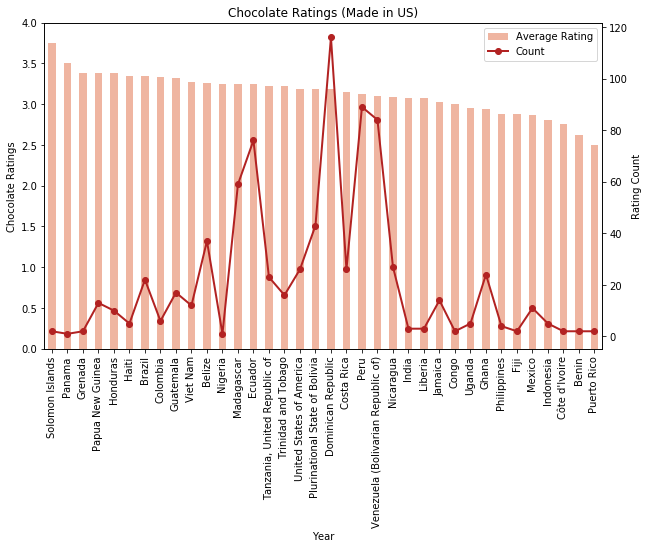

In [95]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(10,6)
#rcParams.keys

import matplotlib.pyplot as plt
plt.figure(figsize=(20,18), dpi=200)
ax = fnl_us[['Average Rating']].plot(kind='bar', color='darksalmon', alpha=0.7, use_index=True, legend=False)
ax2 = ax.twinx()
ax2.plot(fnl_us[['Count']].values, linestyle='-', marker='o', color='firebrick', linewidth=2.0, label="Count")
ax.set_ylim((0, 4))

ax.set_xlabel('Year')
ax.set_ylabel('Chocolate Ratings')
ax2.set_ylabel('Rating Count')
plt.title('Chocolate Ratings (Made in US)')
#plt.xlabel('Year')

# ask matplotlib for the plotted objects and their labels
#documentation is https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels+labels2, loc=0)
plt.savefig('Ratings US.png')
#plt.grid()
plt.show()

In [96]:
cocoa_fra=cocoa_fnl.loc[cocoa_fnl['Company Country Name'] == 'France']
cocoa_fra

,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical,Country Lat,Country Lng,Country Abbr,Origin Lat,Origin Lng,Origin Abbr,Origin Cont,Cocoa % Group
0,A. Morin,Bolivia,797,2012,0.70,3.50,NaN,France,Plurinational State of Bolivia,no,46.227638,2.213749,FR,-16.290154,-63.588653,BO,SA,60 to 70%
1,A. Morin,Peru,797,2012,0.63,3.75,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE,SA,60 to 70%
2,A. Morin,Brazil,1011,2013,0.70,3.25,NaN,France,Brazil,no,46.227638,2.213749,FR,-14.235004,-51.925280,BR,SA,60 to 70%
3,A. Morin,Birmanie,1015,2013,0.70,3.00,NaN,France,Myanmar,no,46.227638,2.213749,FR,21.916221,95.955974,MM,AS,60 to 70%
4,A. Morin,Colombie,1015,2013,0.70,2.75,NaN,France,Colombia,no,46.227638,2.213749,FR,4.570868,-74.297333,CO,SA,60 to 70%
5,A. Morin,Equateur,1011,2013,0.70,3.75,NaN,France,Ecuador,no,46.227638,2.213749,FR,-1.831239,-78.183406,EC,SA,60 to 70%
6,A. Morin,Madagascar,1011,2013,0.70,3.00,Criollo,France,Madagascar,no,46.227638,2.213749,FR,-18.766947,46.869107,MG,AF,60 to 70%
7,A. Morin,Panama,1011,2013,0.70,2.75,NaN,France,Panama,no,46.227638,2.213749,FR,8.537981,-80.782127,PA,NA,60 to 70%
8,A. Morin,Papua New Guinea,1015,2013,0.70,3.25,NaN,France,Papua New Guinea,no,46.227638,2.213749,FR,-6.314993,143.955550,PG,OC,60 to 70%
9,A. Morin,Chanchamayo Province,1019,2013,0.63,4.00,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE,SA,60 to 70%


In [97]:
fnl_fra = cocoa_fra.groupby(['Bean Origin Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_fra=fnl_fra.round(2)
fnl_fra.columns=['Count', 'Average Rating', 'Median Rating']
fnl_fra.head(10)
fnl_fra = fnl_fra.sort_values(['Average Rating'], ascending=False, inplace=False)
fnl_fra.head(10)

,Count,Average Rating,Median Rating
Bean Origin Country Name,,,
Haiti,2,3.75,3.75
Jamaica,2,3.62,3.62
Plurinational State of Bolivia,1,3.50,3.50
Grenada,1,3.50,3.50
Indonesia,2,3.50,3.50
Brazil,8,3.47,3.50
Sao Tome and Principe,7,3.43,3.50
Venezuela (Bolivarian Republic of),28,3.42,3.50
Peru,15,3.42,3.50


<Figure size 4000x3600 with 0 Axes>

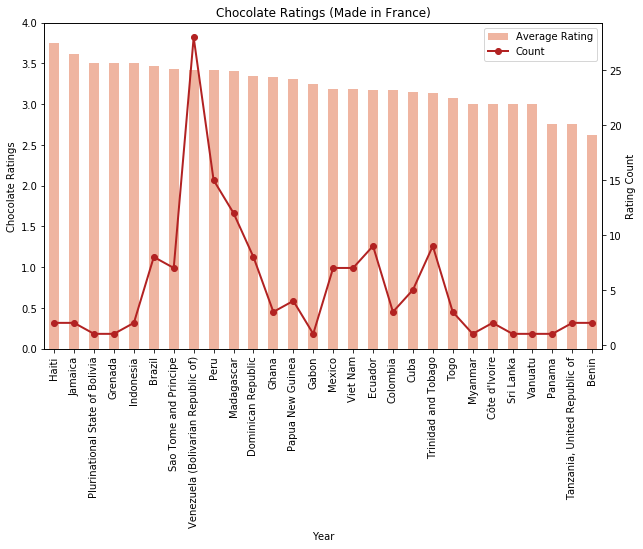

In [98]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(10,6)
#rcParams.keys

import matplotlib.pyplot as plt
plt.figure(figsize=(20,18), dpi=200)
ax = fnl_fra[['Average Rating']].plot(kind='bar', color='darksalmon', alpha=0.7, use_index=True, legend=False)
ax2 = ax.twinx()
ax2.plot(fnl_fra[['Count']].values, linestyle='-', marker='o', color='firebrick', linewidth=2.0, label="Count")
ax.set_ylim((0, 4))

ax.set_xlabel('Year')
ax.set_ylabel('Chocolate Ratings')
ax2.set_ylabel('Rating Count')
plt.title('Chocolate Ratings (Made in France)')
#plt.xlabel('Year')

# ask matplotlib for the plotted objects and their labels
#documentation is https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels+labels2, loc=0)
plt.savefig('Ratings France.png')
#plt.grid()
plt.show()

In [99]:
cocoa_top=cocoa_fnl.loc[(cocoa_fnl['Company Country Name'] == 'United States of America') | (cocoa_fnl['Company Country Name'] == 'France')]
cocoa_top

,Company,Bar Name,RefNo,Review Date,Cocoa %,Rating,Bean Type,Company Country Name,Bean Origin Country Name,Ethical,Country Lat,Country Lng,Country Abbr,Origin Lat,Origin Lng,Origin Abbr,Origin Cont,Cocoa % Group
0,A. Morin,Bolivia,797,2012,0.70,3.50,NaN,France,Plurinational State of Bolivia,no,46.227638,2.213749,FR,-16.290154,-63.588653,BO,SA,60 to 70%
1,A. Morin,Peru,797,2012,0.63,3.75,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE,SA,60 to 70%
2,A. Morin,Brazil,1011,2013,0.70,3.25,NaN,France,Brazil,no,46.227638,2.213749,FR,-14.235004,-51.925280,BR,SA,60 to 70%
3,A. Morin,Birmanie,1015,2013,0.70,3.00,NaN,France,Myanmar,no,46.227638,2.213749,FR,21.916221,95.955974,MM,AS,60 to 70%
4,A. Morin,Colombie,1015,2013,0.70,2.75,NaN,France,Colombia,no,46.227638,2.213749,FR,4.570868,-74.297333,CO,SA,60 to 70%
5,A. Morin,Equateur,1011,2013,0.70,3.75,NaN,France,Ecuador,no,46.227638,2.213749,FR,-1.831239,-78.183406,EC,SA,60 to 70%
6,A. Morin,Madagascar,1011,2013,0.70,3.00,Criollo,France,Madagascar,no,46.227638,2.213749,FR,-18.766947,46.869107,MG,AF,60 to 70%
7,A. Morin,Panama,1011,2013,0.70,2.75,NaN,France,Panama,no,46.227638,2.213749,FR,8.537981,-80.782127,PA,NA,60 to 70%
8,A. Morin,Papua New Guinea,1015,2013,0.70,3.25,NaN,France,Papua New Guinea,no,46.227638,2.213749,FR,-6.314993,143.955550,PG,OC,60 to 70%
9,A. Morin,Chanchamayo Province,1019,2013,0.63,4.00,NaN,France,Peru,no,46.227638,2.213749,FR,-9.189967,-75.015152,PE,SA,60 to 70%


In [100]:
fnl_top = cocoa_top.groupby(['Company Country Name', 'Bean Origin Country Name'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_top=fnl_top.round(2)
fnl_top.columns=['Count', 'Average Rating', 'Median Rating']

fnl_top.head(15)

Count  Average Rating  \
Company Country Name Bean Origin Country Name                          
France               Benin                         2            2.62   
                     Brazil                        8            3.47   
                     Colombia                      3            3.17   
                     Cuba                          5            3.15   
                     Côte d'Ivoire                 2            3.00   
                     Dominican Republic            8            3.34   
                     Ecuador                       9            3.17   
                     Gabon                         1            3.25   
                     Ghana                         3            3.33   
                     Grenada                       1            3.50   
                     Haiti                         2            3.75   
                     Indonesia                     2            3.50   
                     Jamaica                       2            3.62   
                     Madagascar                   12            3.40   
                     Mexico                        7            3.18   

                                               Median Rating  
Company Country Name Bean Origin Country Name                 
France               Benin                              2.62  
                     Brazil                             3.50  
                     Colombia                           3.25  
                     Cuba                               3.00  
                     Côte d'Ivoire                      3.00  
                     Dominican Republic                 3.50  
                     Ecuador                            3.00  
                     Gabon                              3.25  
                     Ghana                              3.25  
                     Grenada                            3.50  
                     Haiti                              3.75  
                     Indonesia                          3.50  
                     Jamaica                            3.62  
                     Madagascar                         3.25  
                     Mexico                             3.00

In [101]:
# creating a pivot table that shows France and US Ratings
pivot1 = pd.pivot_table(fnl_top, values='Average Rating', index='Bean Origin Country Name', columns='Company Country Name', aggfunc='median')
pivot1 = pivot1.dropna(axis=0, subset=['France', 'United States of America'])

pivot1

Company Country Name,France,United States of America
Bean Origin Country Name,,
Benin,2.62,2.62
Brazil,3.47,3.34
Colombia,3.17,3.33
Côte d'Ivoire,3.00,2.75
Dominican Republic,3.34,3.18
Ecuador,3.17,3.24
Ghana,3.33,2.94
Grenada,3.50,3.38
Haiti,3.75,3.35


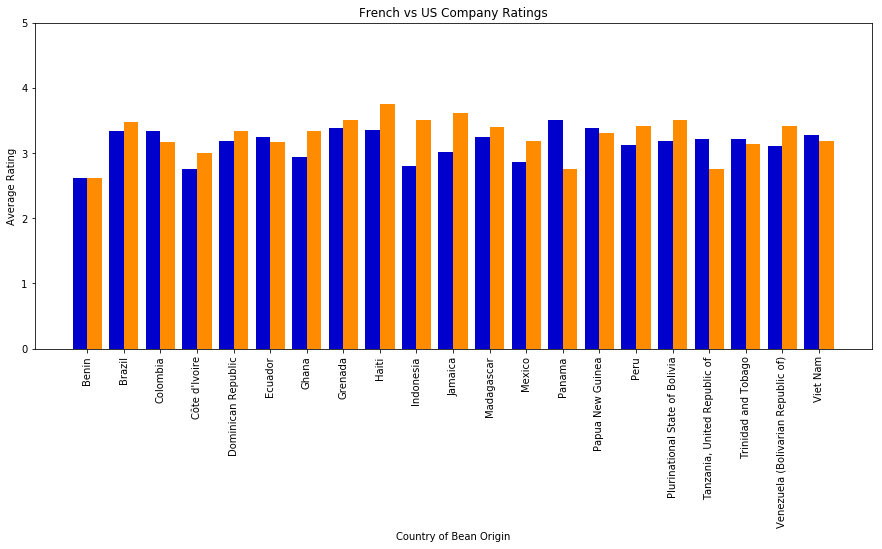

In [102]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(15,6)
#rcParams.keys

import matplotlib.pyplot as plt

x = pivot1.index
y = pivot1['United States of America']
z = pivot1['France']
#w = pivot1['Canada']
_x=np.arange(len(x))

plt.ylim(0, 5)

#tick_locations = [value for value in x]
#plt.xticks(tick_locations, x)

#plt.bar(x, y, color='firebrick', alpha=.75, align="center")
#plt.bar(x, z, color='skyblue', alpha=.75, align="center")
#plt.bar(x, w, color='forestgreen', alpha=.75, align="center")

plt.bar(_x - 0.2, y, 0.4, color='mediumblue')
plt.bar(_x + 0.2, z, 0.4, color='darkorange')
#plt.bar(_x + 0.4, w, 0.4)
plt.xticks(_x, x, rotation=90) # set labels manually


plt.title("French vs US Company Ratings")
plt.xlabel("Country of Bean Origin")
plt.ylabel("Average Rating")
plt.savefig('Ratings US vs France.png')
#plt.grid()
plt.show()

In [103]:
fnl_top_cont = cocoa_top.groupby(['Company Country Name', 'Origin Cont'])['Rating'].\
    agg(['count', 'mean', 'median'])
fnl_top_cont=fnl_top_cont.round(2)
fnl_top_cont.columns=['Count', 'Average Rating', 'Median Rating']

fnl_top_cont.head(15)

Count  Average Rating  Median Rating
Company Country Name     Origin Cont                                      
France                   AF              32            3.25           3.25
                         AS              11            3.20           3.25
                         NA              35            3.26           3.25
                         None            12            2.62           2.75
                         OC               5            3.25           3.00
                         SA              64            3.38           3.50
United States of America AF             121            3.14           3.00
                         AS              24            3.08           3.12
                         NA             310            3.18           3.25
                         None            27            3.08           3.00
                         OC              17            3.37           3.50
                         SA             320            3.17           3.25

In [104]:
# creating a pivot table that shows France and US Ratings
pivot2 = pd.pivot_table(fnl_top_cont, values='Average Rating', index='Origin Cont', columns='Company Country Name', aggfunc='median')
pivot2 = pivot2.dropna(axis=0, subset=['France', 'United States of America'])

pivot2

Company Country Name,France,United States of America
Origin Cont,,
AF,3.25,3.14
AS,3.20,3.08
NA,3.26,3.18
None,2.62,3.08
OC,3.25,3.37
SA,3.38,3.17


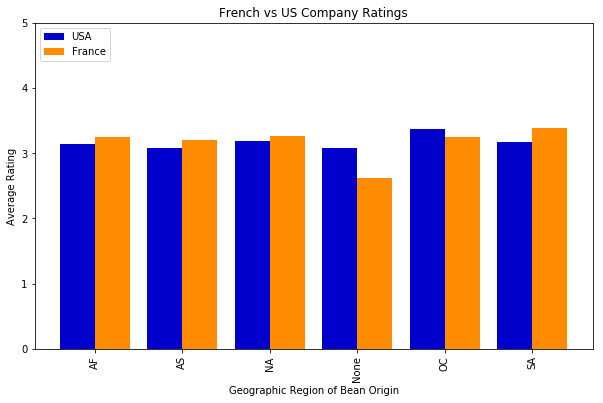

In [105]:
from matplotlib import rcParams
#matplotlib object,can reference parameters and adjust them

rcParams['figure.figsize']=(10,6)
#rcParams.keys
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

x = pivot2.index
y = pivot2['United States of America']
z = pivot2['France']
country=['USA', "France"]
#w = pivot1['Canada']
_x=np.arange(len(x))

plt.ylim(0, 5)

#tick_locations = [value for value in x]
#plt.xticks(tick_locations, x)

#plt.bar(x, y, color='firebrick', alpha=.75, align="center")
#plt.bar(x, z, color='skyblue', alpha=.75, align="center")
#plt.bar(x, w, color='forestgreen', alpha=.75, align="center")

plt.bar(_x - 0.2, y, 0.4, color='mediumblue')
plt.bar(_x + 0.2, z, 0.4, color='darkorange')
#plt.bar(_x + 0.4, w, 0.4)
plt.xticks(_x, x, rotation=90) # set labels manually

plt.title("French vs US Company Ratings")
plt.xlabel("Geographic Region of Bean Origin")
plt.ylabel("Average Rating")
plt.legend(country,loc=2)

plt.savefig('Ratings US vs France.png')

#plt.grid()
plt.show()